# `matplotlib` Tutorial

---

Author: Riley X. Brady

Date: February 6th, 2019; Updated October 22nd, 2019

Contact: 
* riley.brady@colorado.edu
* www.rileyxbrady.com

---

`matplotlib` is a powerful package for making static publication-quality graphics.

## References

1. [matplotlib example gallery](https://matplotlib.org/gallery/index.html)
2. [matplotlib style sheets reference](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)
3. [markers](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
4. [line styles](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)

## Other Tutorials

1. [Effectively Using Matplotlib](http://pbpython.com/effective-matplotlib.html?utm_campaign=Data_Elixir&utm_medium=email&utm_source=Data_Elixir_129)
2. [Python Plotting with Matplotlib](https://realpython.com/python-matplotlib-guide/)

In [1]:
# needed for Jupyter notebooks.
%matplotlib inline 

## 1. Setting up your plot

---

The matplotlib [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) object incorporates the whole window in the user interface. You can just have one plot (e.g., a line plot) in your figure object, or you could have multiple *subplots*. However, to me, the base figure object is unnecessary. In the below example, you have to create a figure object, then a subplot object.

**NOTE**: Do not import the package your using in every cell in a normal working notebook. I just do this for the tutorial so that once can execute them in isolation without worrying about going from top to bottom of the notebook (although you should probably go from top to bottom).


Here's a more friendly figure of all the different axis properties you can change:

![](https://pbpython.com/images/matplotlib-anatomy.png)

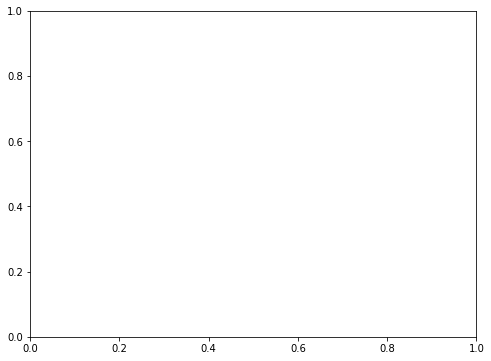

In [2]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8,6))
plt.subplot()

I prefer the [subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) command which returns both figure and axes objects, making things a bit easier. My advice: always start your figures with `plt.subplots()`.

**There are plenty of powerful alternatives to aid in making complex subplot arrays, such as [gridspec](https://matplotlib.org/users/gridspec.html).**

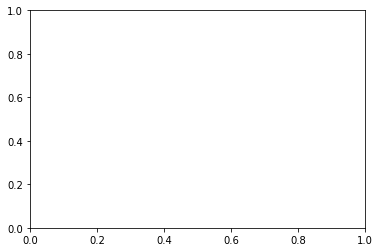

In [3]:
import matplotlib.pyplot as plt

# A single plot. 'fig' controls figure properties; 'ax' control axis properties.
fig, ax = plt.subplots()

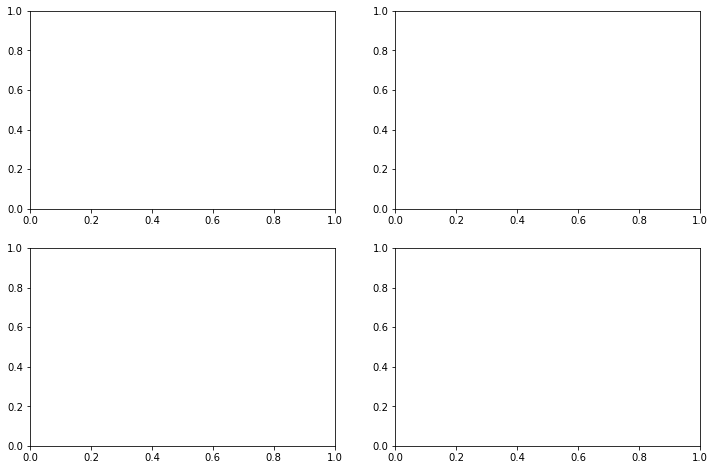

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)

<strong><span style="color:red">Try playing with different `figsize` values, as well as different combinations of `nrows` and `ncols` to gain intuition for what they do.</span></strong>

The `help` page for `subplots` tells you what other options could be used in this function. There's also an example gallery of different `subplots()` commands at the bottom. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html

## 2. Line Plots

---

The `plot` method plots a simple line plot. It expects at the least a list or array of time series values:

```python
x = np.linspace(-np.pi, np.pi, 64, endpoint=True)
y = np.cos(x)
plt.plot(y)
```

You can also add on an x-axis:

```python
x = np.linspace(-np.pi, np.pi, 64, endpoint=True)
y = np.cos(x)
plt.plot(x, y)
```

Note that `scatter` is quite similar and produces a scatter plot. It won't be covered here, but you can find the documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter).

In [4]:
import numpy as np

# generate sine and cosine sample data.
X = np.linspace(-np.pi, np.pi, 64, endpoint=True)
C, S = np.cos(X), np.sin(X)

### 2.1 Default Line Plot

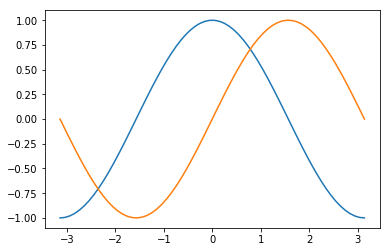

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# It's a good habit to tell matplotlib exactly which axis you're plotting on
# by running `ax.plot(...)` instead of `plt.plot(...)`
ax.plot(X, C)
ax.plot(X, S)

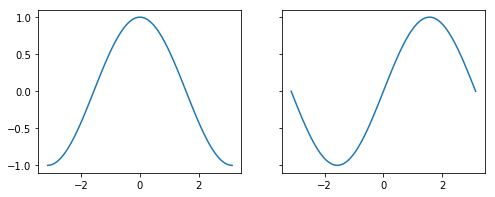

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,3), ncols=2, sharex=True,
                       sharey=True)
# subplots are indexed. if you have both columns and rows,
# you would index like ax[0,0,], ax[0,1] and so on.
ax[0].plot(X, C)
ax[1].plot(X, S)

### 2.2 Now with a legend!

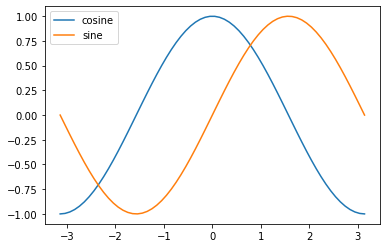

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# The label on the legend for the given line is set using `label=`
ax.plot(X, C, label='cosine')
ax.plot(X, S, label='sine')
ax.legend()

![](https://i.imgur.com/LZ8pO6S.png)

<strong><span style="color:red">Try changing the location of the legend, by passing the keyword `loc=#` to `ax.legend()`.</span></strong>

Here is the legend documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html. You'll find a few other optional keywords to make your legend box "fancy", different colors, etc. As always look at the gallery at the bottom for some contained examples.

### 2.3 Line plot aesthetics

---

These principles apply to most plot types for `matplotlib`. You will get an intuition as to when you can use certain keywords.

#### Keywords:

**color**: (string) color of the line

**linewidth**: (integer) width of line

**linestyle**: (string) style of line to be plotted

**marker**: (string) type of marker to plot over line ([reference](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers))

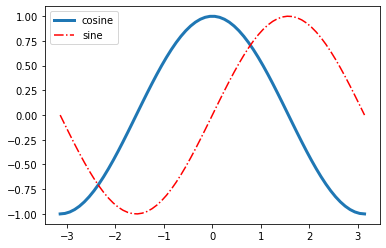

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(X, C, label='cosine', linewidth=3)
ax.plot(X, S, label='sine', linestyle='-.', color='red')
ax.legend()

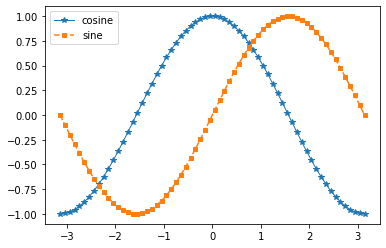

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(X, C, label='cosine', linewidth=1, marker='*')
ax.plot(X, S, label='sine', linestyle='--', marker='s', markersize=4)
ax.legend()

<strong><span style="color:red">Try out different linewidths, markers, colors, and so on.</span></strong>

## 3. Axes and Labeling

---

We've looked so far at the actual content of our plots. After making a figure/subplot, we have filled it with line plots and played around with their aesthetics. But how do we alter the axes around them?

We can pass commands to our `ax` object that came out of `plt.subplots`. These generally take the format of `ax.set_PROP()` where `PROP()` is some property.

**Properties**:

* xlim, ylim : the range of the x and y axes. Expects brackets with comma-separated values.
* title : the title of the subplot. Expects a string.
* xlabel, ylabel : labels for the x and y axes. Expects a string.
* xticks, yticks : which ticks to show. Expects a list of values.
* xticklabels, yticklabels: what to label the ticks with. Expects a list of strings of the same length as xticks/yticks.

And [many many more](https://matplotlib.org/api/axes_api.html). 

In [7]:
import numpy as np

# Generate some time series with a linear trend and some noise.
x = np.arange(0, 100)
y = np.linspace(0, 2, 100) + np.random.rand(100,)

Here is an example of polishing up the plot a bit.

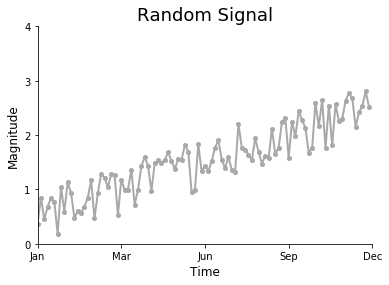

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2, color='#a9a9a9', marker='o', markersize=4)

# axes changes. Lots of MATLAB conventions here, if you're comfortable
# with that.
ax.set_xlim([0, 100])
ax.set_ylim([0, 4])
ax.set_title('Random Signal', fontsize=18)
ax.set_ylabel('Magnitude', fontsize=12)
ax.set_xlabel('Time', fontsize=12)

# ticks
ax.set_xticks([0,25,50,75,100])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['Jan', 'Mar', 'Jun', 'Sep', 'Dec'])

# spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

<strong><span style="color:red">Play around with the many options to discover your own style for plots. You can add grid lines among many other things.</span></strong>

Again, check out the many axis properties you can change here: https://matplotlib.org/api/axes_api.html



## 4. Style Sheets

---

It's definitely tedious to change plot styles every single time you make a plot (it takes a lot of lines of code!). There is a nice work around with "style sheets." There's a bunch of out-of-the-box ones that make your plots look great. 

If you're really into it, you can make your own: https://matplotlib.org/users/style_sheets.html

In [13]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

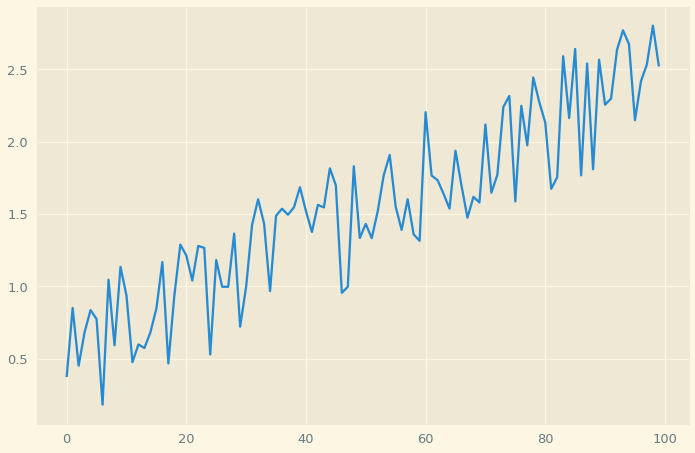

In [15]:
plt.style.use('seaborn-talk')
fig, ax = plt.subplots()
ax.plot(x, y)

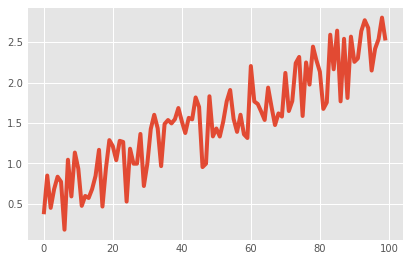

In [10]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(x, y)

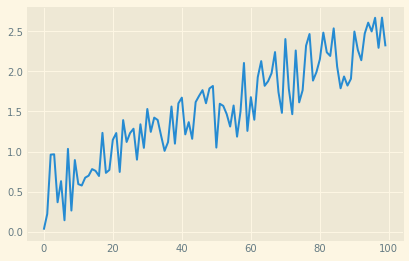

In [16]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(x, y)

<strong><span style="color:red">Try out a few styles of your own!</span></strong>

Reset to the default for the rest of the notebook

In [16]:
plt.style.use('default')

## 5. Meshes

---

In climate research, we work a lot with grids of data. Something like sea surface temperature (SST) could have dimensions (time, latitude, longitude). Other variables have depth components. We can visualize these with `pcolor`, `pcolormesh`, `contour`, and `contourf`. I'll cover the `pcolormesh` and `contourf` functions here.

My example dataset here is sea surface temperatures from 1970-1980 in the Community Earth System Model (CESM) for a single simulation.

**NOTE**: We'll work on manipulating these data in `xarray` in another notebook.

Dimensions here are 372 (months) by 384 (latitude) by 320 (longitude)

In [19]:
import xarray as xr

In [21]:
!pip install netcdf4 # wow this is cool

    100% |████████████████████████████████| 6.4MB 3.4MB/s 
    100% |████████████████████████████████| 563kB 17.7MB/s 


In [23]:
# We're just using xarray to open the data for now.
# Another notebook will leverage it for analysis.
data = xr.open_dataset('../data/CESM.003.SST.1980.nc')
lat = np.array(data.lat)
lon = np.array(data.lon)
data = np.array(data.SST)

In [24]:
# the dimensions are 12 months x 180 latitude x 360 longitude
print(data.shape)

(12, 180, 360)


In [27]:
import numpy as np

# take mean over the year.
meandata = np.mean(data, axis=0)

# monthly anomalies from the annual mean. Not really any useful scientifically,
# but this will demo diverging colormaps. This truly shows the seasonal cycle.
anom = data - meandata

### 5.1 Basic `pcolormesh` map

---

It's almost always best to use `ax.pcolormesh` as it is a much faster version of `ax.pcolor`. If you are just plotting a region of the globe, you can use `ax.pcolor`. 

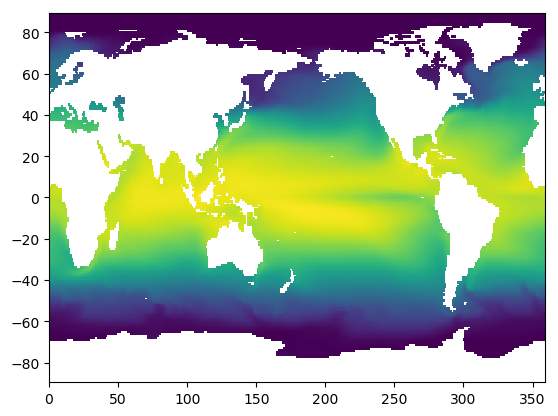

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pcolormesh(lon, lat, meandata)

### 5.2 Add a colorbar

We need to give our colors some context. A colorbar helps us to map the quantities to color.

Text(0.5, 0, 'Longitude')

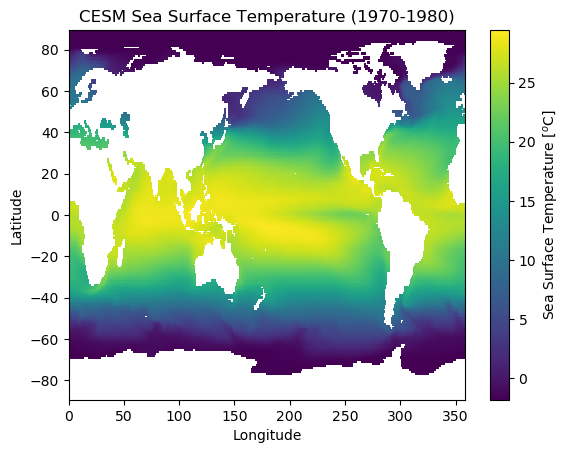

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
p = ax.pcolormesh(lon, lat, meandata)
cb = plt.colorbar(p)

# Aesthetics
cb.set_label('Sea Surface Temperature [$^{o}$C]')
ax.set_title('CESM Sea Surface Temperature (1970-1980)')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

### 5.3 Play with colormaps :)

Just insert a string from below! You can do `CMAP_r` to reverse the colors, like `RdBu_r`

The full colormap reference is here: https://matplotlib.org/examples/color/colormaps_reference.html

![](https://i.imgur.com/pcw5QyA.png)
![](https://i.imgur.com/S3rSvag.png)
![](https://i.imgur.com/fX9oF78.png)
![](https://i.imgur.com/r2ssLP7.png)

Text(0.5, 0, 'Longitude')

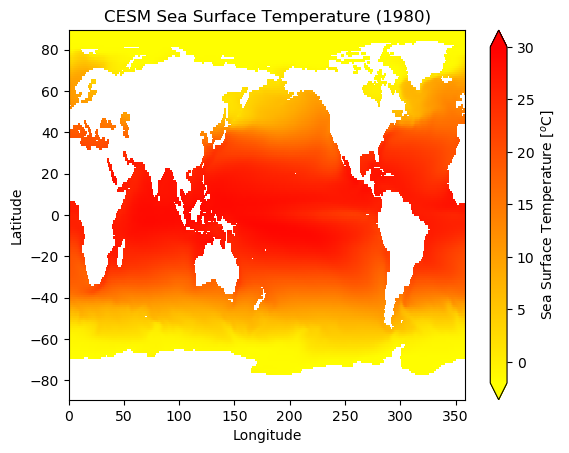

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
p = ax.pcolormesh(lon, lat, meandata, cmap="autumn_r",
                  vmin=-2, vmax=30)
cb = plt.colorbar(p, extend="both")

# Aesthetics
cb.set_label('Sea Surface Temperature [$^{o}$C]')
ax.set_title('CESM Sea Surface Temperature (1980)')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

Text(0.5, 0, 'Longitude')

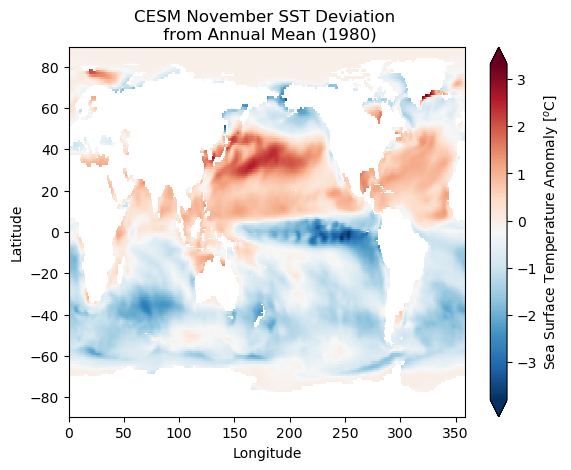

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
p = ax.pcolormesh(lon, lat, anom[10], cmap="RdBu_r")
cb = plt.colorbar(p, extend="both")

# Aesthetics
cb.set_label('Sea Surface Temperature Anomaly [$^{o}$C]')
ax.set_title('CESM November SST Deviation \n from Annual Mean (1980)')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

<strong><span style="color:red">Play around with the various colormaps below.</span></strong>

### `contourf`

A quick look at `contourf`, which creates contours instead of creating a color at every grid cell like `pcolormesh`.

Further documentation on `contourf` can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html

Text(0.5, 0, 'Longitude')

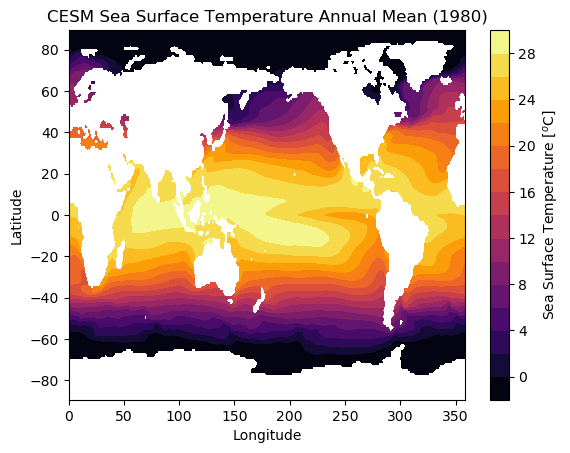

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# contourf takes the `levels` keyword to determine where to draw contours.
p = ax.contourf(lon, lat, meandata, levels=np.arange(-2, 31, 2),
                cmap='inferno')
cb = plt.colorbar(p, extend="both")

# Aesthetics
cb.set_label('Sea Surface Temperature [$^{o}$C]')
ax.set_title('CESM Sea Surface Temperature Annual Mean (1980)')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

<strong><span style="color: red">Play around with `contourf` options and colors below!</span></strong>

## 6. Geography

The plots above are a decent first glance at the data, but aren't good in terms of cartography. Luckily we have a package for that!

This serves just as a very simple high-level demo of what cartopy can do to improve upon matplotlib. See their [website](https://scitools.org.uk/cartopy/docs/latest/) for tons of demos and information.

In [30]:
import cartopy.crs as ccrs # map projectsions
import cartopy.feature as cfeature # coastlines
from cartopy.util import add_cyclic_point

Here we have to set up a special subplot type using the `subplot_kw` command. This allows us to identify a map projection we'd like to use. We then add land through the `add_feature` command.

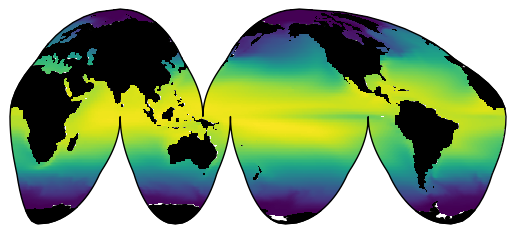

In [44]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.InterruptedGoodeHomolosine(central_longitude = 180)))
ax.add_feature(cfeature.LAND, color='k')
# The transform keyword is necessary to transform from a flat 2D map (in the above cases) 
# to more complex projections
#ax.pcolormesh(lon, lat, meandata, transform=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, meandata, transform=ccrs.PlateCarree())

Note that the "seam" issue is common. Cartopy has a workaround to make sure you don't have a visible seem where your data wraps around.

In [45]:
# Get rid of that nasty seam!
cyclic_data, cyclic_lons = add_cyclic_point(meandata, coord=lon)

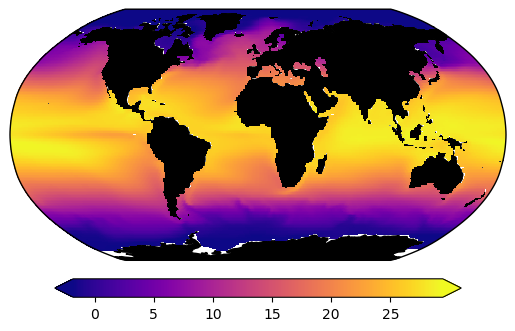

In [46]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))
ax.add_feature(cfeature.LAND, color='k')
p = ax.pcolormesh(cyclic_lons, lat, cyclic_data, transform=ccrs.PlateCarree(),
                  cmap="plasma")
plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,
             extend="both")

There are tons of projections!

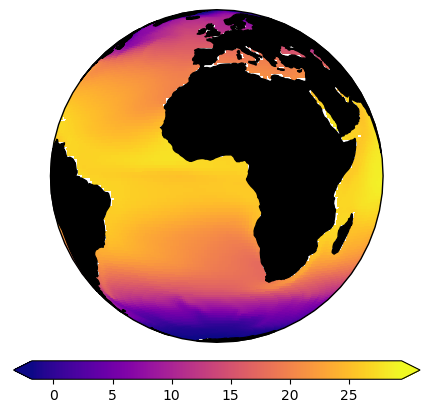

In [43]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Geostationary()))
p = ax.pcolormesh(cyclic_lons, lat, cyclic_data, transform=ccrs.PlateCarree(),
                  cmap="plasma")
# sometimes you need to invoke zorder to layer things on top of each other
ax.add_feature(cfeature.LAND, color='k', zorder=4)
plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,
             extend="both")

<strong><span style="color: red">Try out different projections below, change colormaps, etc. below</span></strong>.
              

Here's all the different projections offered through `cartopy`: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html. Note that they have different options associated with each.

You can do `fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Geostationary(central_longitude=...)))` to set a specific longitude to center the globe on.

Gridlines! (https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html)

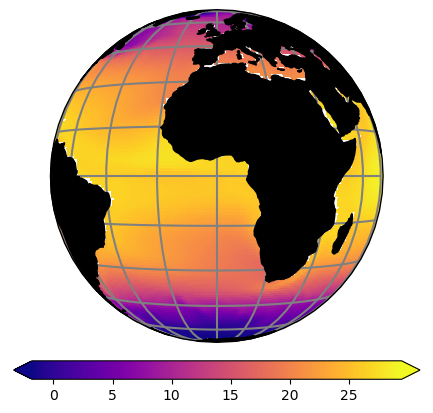

In [47]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Geostationary()))
p = ax.pcolormesh(cyclic_lons, lat, cyclic_data, transform=ccrs.PlateCarree(),
                  cmap="plasma")
# sometimes you need to invoke zorder to layer things on top of each other
ax.add_feature(cfeature.LAND, color='k', zorder=4)
plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,
             extend="both")

# grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1.5, color='gray', linestyle='-')

Note that currently, grid line labeling only works for Mercator and Plate Carree. `basemap` is a useful alternative package to get grid line labeling, but they aren't under ongoing development anymore.

Here's some documentation on grid lining options: https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html

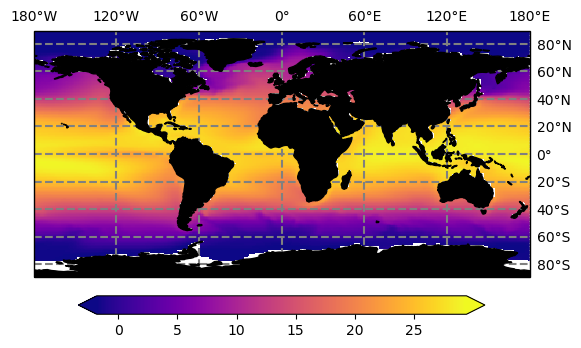

In [48]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
p = ax.pcolormesh(cyclic_lons, lat, cyclic_data, transform=ccrs.PlateCarree(),
                  cmap="plasma")
# sometimes you need to invoke zorder to layer things on top of each other
ax.add_feature(cfeature.LAND, color='k', zorder=4)
plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,
             extend="both")

# grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1.5, color='gray', linestyle='--')
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

<strong><span style="color:red">Use this free space below to experiment with different `cartopy` features.</span></strong>

Here's a gallery with examples: https://scitools.org.uk/cartopy/docs/latest/gallery/index.html for inspiration.